# Optimizing K in K-means: A Visual and Quantitative Exploration

## Introduction

In this project, I will apply **K-means clustering** to perform **color compression** on a photograph of tulips. K-means groups data points based on similarity, making it ideal for reducing image colors while preserving essential structure. I will begin with **Exploratory Data Analysis (EDA)** by visualizing the RGB (Red, Green, Blue) color distribution in 3D space. The process involves reshaping the image into a pixel-RGB matrix, applying K-means with varying **k** values, and comparing compressed images to observe how cluster count affects image quality. Alongside, I’ll explain key concepts like centroid initialization, distance minimization, and convergence.

While image compression offers visual intuition for clustering, it raises an important question: **how do I choose the optimal k when visual inspection isn’t possible?** To answer this, the project will transition to **synthetic, high-dimensional data**, introducing **inertia** and **silhouette scores** to evaluate clustering quality numerically. This workflow mirrors real-world practice — starting with visual, interpretable examples, developing quantitative techniques for abstract data, and applying these methods back to practical problems. Together, these approaches showcase K-means’ versatility in transforming both visual and complex data into meaningful patterns.

## Overview

This project explores the application of **K-means clustering** for **color compression in images** and **high-dimensional synthetic data**, demonstrating how to determine the optimal number of clusters (*k*) using both visual and quantitative evaluation methods. The goal is to understand how K-means groups similar data points, assess clustering performance, and apply these techniques to real-world scenarios where visual validation is not possible.  

To achieve this, I will:  

- **Perform Exploratory Data Analysis (EDA):** Visualize the RGB color distribution of a tulip photograph in 3D space, reshape the image into a pixel-RGB matrix, and analyze color patterns to understand clustering behavior in an interpretable, low-dimensional setting.  
- **Apply K-means for Image Compression:** Experiment with varying *k* values (2 to 10) to compress the image, replacing pixel colors with their nearest cluster centroids, and observe how increasing *k* affects image quality and granularity.  
- **Transition to High-Dimensional Data:** Generate synthetic data with hidden clusters using `make_blobs`, standardize features to ensure fair distance calculations, and highlight the challenges of clustering when visual inspection is impossible.  
- **Evaluate Clustering Performance Quantitatively:** Use **inertia** (within-cluster sum of squares) to identify the "elbow point" for optimal *k* and compute **silhouette scores** to measure cluster separation and cohesion, validating results against ground truth labels.  
- **Interpret Model Outputs:** Analyze cluster centroids, assign new data points to clusters, and calculate distances to centroids for applications like anomaly detection or feature engineering in supervised learning.  
- **Discuss Limitations and Extensions:** Address K-means’ assumptions (e.g., globular clusters, sensitivity to scaling) and propose next steps, such as testing DBSCAN for non-convex clusters or integrating clustering outputs into predictive models.  

By following this workflow, I demonstrate how K-means can simplify complex data—from reducing image colors to segmenting multidimensional datasets—while emphasizing the importance of metric-driven evaluation in unsupervised learning. The results showcase practical applications in fields like **computer vision, customer segmentation, and anomaly detection**, where clustering reveals hidden patterns without labeled data.

## **Dataset Structure**

### **Tulip Image Dataset**

This dataset contains pixel color values extracted from a photograph of tulips, designed to demonstrate how **K-means clustering** can compress images by grouping similar colors.

The original image has the following structure:

* **Shape:** (320, 240, 3) — representing **76,800 pixels**, each with **Red, Green, and Blue (RGB)** values.
* **RGB Values:** Each pixel is a 3-dimensional vector with values ranging from **0 to 255**, indicating its intensity for the **Red**, **Green**, and **Blue** color channels.

To prepare this image for clustering, it was reshaped into a **76,800 × 3 matrix**, where each row corresponds to a single pixel and each column represents one of its color intensities. This restructuring is necessary because **K-means clustering (like most machine learning algorithms) expects data in a 2D format**:

* **Rows = individual observations (pixels)**
* **Columns = features per observation (R, G, B values)**

After reshaping, the pixel data was converted into a **pandas DataFrame** to make it easier to **explore, visualize, and preprocess** before clustering.

#### **Dataset: tulips\_photo.jpg**

This dataframe includes the following features:

* **r**: The intensity of the **Red** color channel for each pixel (0-255).
* **g**: The intensity of the **Green** color channel for each pixel (0-255).
* **b**: The intensity of the **Blue** color channel for each pixel (0-255).

This structured dataset enables clustering based on color similarity, facilitating image compression by reducing the number of distinct colors while preserving the overall structure and appearance of the tulip photograph.

### **Synthetic Dataset**

This synthetic dataset simulates high-dimensional data to demonstrate how K-means clustering operates when visual confirmation of clusters is impossible.

#### **Dataset: Synthetic Blobs**

* **Samples:** 1,000
* **Features:** 6 continuous, numeric variables
* **Clusters:** Randomly assigned between 3 and 6 (hidden during clustering)

The dataset was generated using **scikit-learn’s `make_blobs`** and standardized to ensure each feature has a mean of 0 and standard deviation of 1. This setup mimics real-world scenarios where clustering must rely on quantitative metrics. The analysis involves determining the optimal number of clusters using **inertia** and **silhouette scores**, and validating K-means’ performance against the hidden ground truth.

This synthetic example highlights how clustering evaluation shifts from visual intuition to mathematical rigor as data dimensionality increases.

### **Importing Required Libraries**

Before beginning the analysis, I will import essential Python libraries that support data processing, visualization, machine learning model development, and notebook format handling. These libraries provide the core functionality for managing structured data, generating synthetic datasets, visualizing complex patterns, working with notebook structures, and applying unsupervised learning techniques like clustering.

### **Library & Package Versions**

To ensure **reproducibility, stability, and compatibility**, I will maintain consistent library versions throughout the project. The following versions will be used in this analysis:

* **NumPy:** 2.2.5
* **Pandas:** 2.2.3
* **Matplotlib:** 3.10.3
* **Seaborn:** 0.13.2
* **Plotly:** 6.0.1
* **Scikit-learn:** 1.6.1
* **Nbformat:** 5.10.4

Using fixed package versions ensures that results remain consistent and reproducible across different computing environments and over time.

### **Imports and Setup**

**Core Data Processing**

* `numpy` for numerical computations and array operations.
* `pandas` for manipulating and handling tabular data using DataFrames.

**Data Visualization**

* `matplotlib.pyplot` for creating general-purpose static plots.
* `seaborn` for statistical and aesthetically enhanced data visualizations.
* `plotly.graph_objects`, `plotly.express`, and `plotly.io` for interactive and dynamic visualizations, particularly useful for exploring cluster patterns.

**Machine Learning and Clustering**

* `KMeans` from `sklearn.cluster` for applying the K-means clustering algorithm.
* `silhouette_score` from `sklearn.metrics` for evaluating clustering quality.
* `StandardScaler` from `sklearn.preprocessing` for feature standardization before clustering.

**Synthetic Data Generation**

* `make_blobs` from `sklearn.datasets` to generate multidimensional synthetic datasets for quantitative evaluation of clustering performance.

**Notebook Format Handling**

* `nbformat` for managing, reading, and writing Jupyter Notebook file structures, particularly relevant when working with notebook metadata or custom notebook-based workflows.

* **Model persistence**:

  * `pickle` — to save trained models for reuse and deployment, ensuring reproducibility.

In [1]:
# Standard Libraries for Data Processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data Generation
from sklearn.datasets import make_blobs

# Notebook Format Handling
import nbformat

# For saving models
import pickle

# Using K-means for color compression 

## Introduction

This section serves as a demonstration of how the K-means clustering algorithm works in practice, focusing on both its underlying theory and observable results. By applying K-means to a real photograph rather than synthetic data, this example offers a tangible, intuitive way to visualize how the algorithm groups similar data points—in this case, colors—into clusters. It also reinforces my understanding of K-means' core mechanics by illustrating the impact of clustering decisions directly on image data.

# Overview

To demonstrate K-means clustering in a practical, visual context, this section applies the algorithm to a digital photograph. The goal is to show how K-means simplifies complex data—in this case, a wide range of pixel colors—by grouping similar values together. Using a tulip photograph, pixels will be clustered based on their RGB values, with different *k* values controlling the number of color groups. This offers an intuitive look at how the algorithm works and how it affects the image.

The exercise highlights how clustering reduces data complexity while preserving essential structure. It also illustrates the importance of choosing an appropriate *k*, and sets the stage for extending these ideas to higher-dimensional, non-visual datasets where results must be evaluated mathematically rather than visually.

### Import Packages

I will start by importing the necessary Python libraries for this demonstration:

* **numpy** for numerical operations and working with arrays
* **pandas** for handling and manipulating data structures
* **matplotlib.pyplot** for creating static visualizations and exploratory plots
* **plotly.graph\_objects** and **plotly.express** for building interactive, web-based visualizations
* **plotly.io** for managing Plotly’s rendering behavior and display settings
* **sklearn.cluster.KMeans** for implementing the K-means clustering algorithm to group similar data points based on their attributes

### Read in data

The "data" in this case is a photograph, which I'll convert into a numerical array.

In [2]:
img = plt.imread(r'C:\Users\saswa\Documents\GitHub\Optimizing-K-in-K-means--A-Visual-and-Quantitative-Exploration\Data\tulips_photo.jpg')

(320, 240, 3)


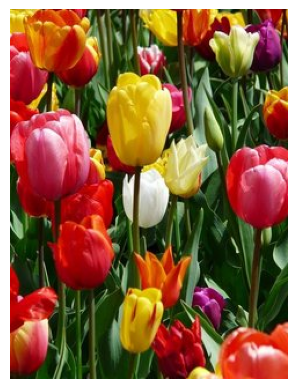

In [3]:
print(img.shape)
plt.imshow(img)
plt.axis('off');

Here I have a photograph of some tulips. The image shape is 320 by 240 by 3. This means the photo contains 320 vertical pixels and 240 horizontal pixels.

But what does the third dimension of 3 represent? It encodes the color information for each pixel. Each pixel has three values: red (R), green (G), and blue (B), which together define the pixel’s color. Each of these values ranges from 0 to 255.

Because each color channel has 256 possible values, the total number of possible color combinations is 256³, or over 16 million unique colors.

To prepare this data for modeling, I will reshape the image into a 2D array where each row corresponds to a single pixel’s RGB values. This way, each pixel becomes a data point with three features: R, G, and B.

In [4]:
img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
img_flat[:5, :]

array([[211, 197,  38],
       [199, 181,  21],
       [178, 154,   0],
       [185, 152,   0],
       [184, 145,   0]], dtype=uint8)

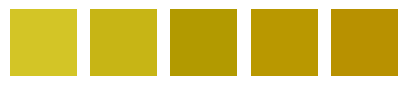

In [5]:
plt.figure(figsize=(5,1))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow([[img_flat[i]]])
    plt.axis('off')
plt.show()

In [6]:
img_flat.shape

(76800, 3)

## Plot the data in 3-D space

Now I have an array that’s 76,800 by 3. Each row represents a single pixel’s RGB color values. Since there are only three columns — one for each color channel — I can visualize this data in 3-dimensional space. To make it easier to explore and visualize, I’ll convert it into a pandas dataframe.

In [7]:
img_flat_df = pd.DataFrame(img_flat, columns = ['r', 'g', 'b'])
img_flat_df.head()

,r,g,b
0,211,197,38
1,199,181,21
2,178,154,0
3,185,152,0
4,184,145,0


I set Plotly’s default renderer to 'notebook' for inline display; if it doesn’t work in the environment, I recommend switching it to 'browser' to view the plots.

In [8]:
pio.renderers.default = 'notebook'

In [ ]:
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for r,g,b 
                                        in zip(img_flat_df.r.values, 
                                               img_flat_df.g.values, 
                                               img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0),
                               )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

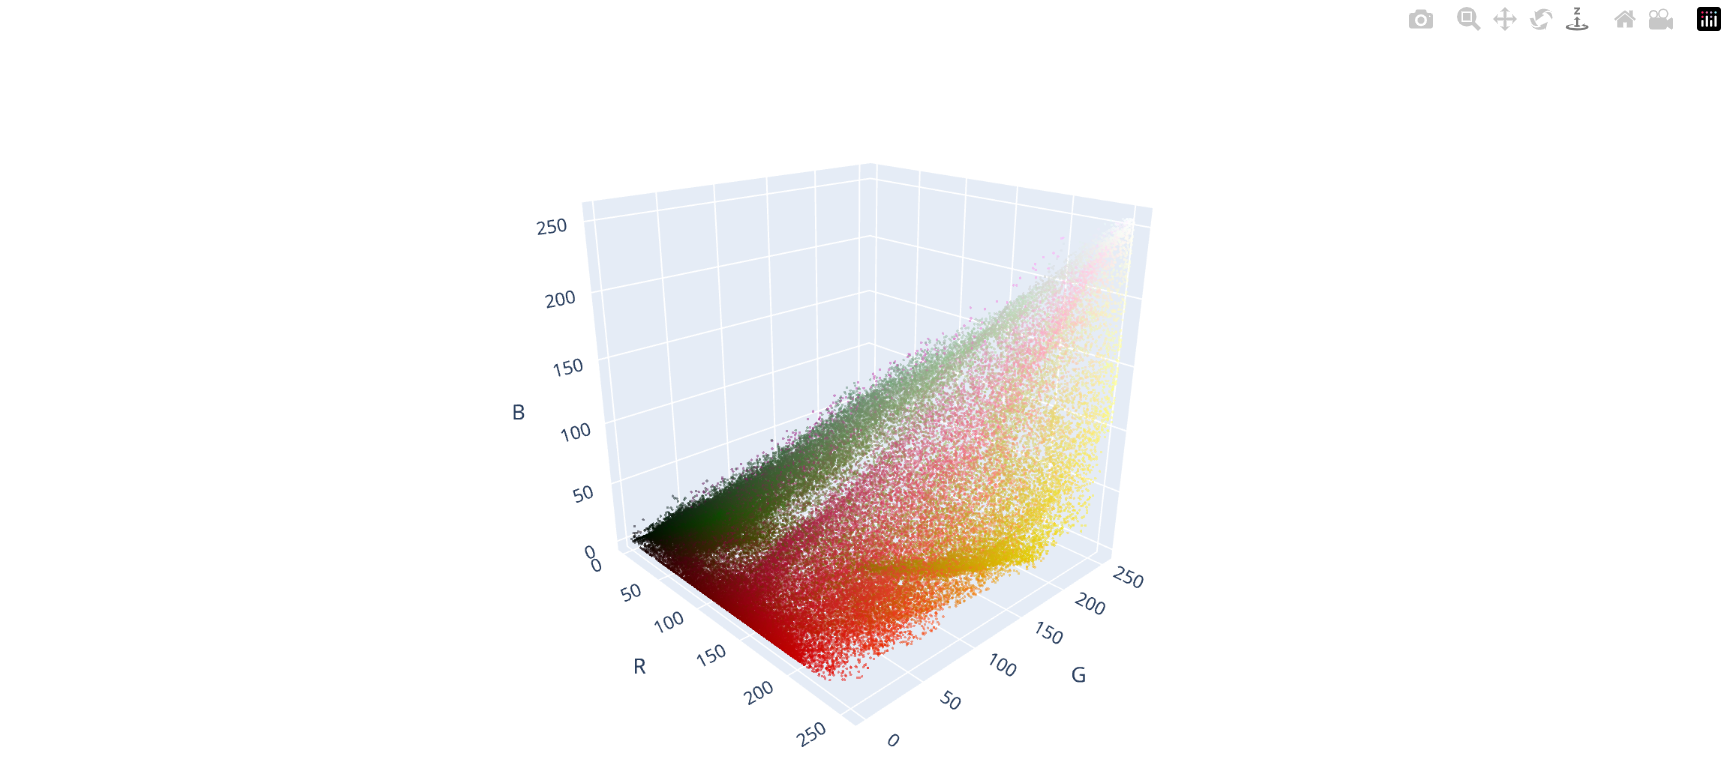

In this graph, each dot represents a color or pixel from the original tulip image. The intensity of the color shows how many dots are clustered in that area — the denser the dots, the more common that color is in the photo. The most abundant colors, like reds, greens, and yellows, appear as the biggest clusters.

**Note:** The graph can be clicked and spun to view from different angles, and zoomed in or out to explore the color distribution more closely. This interactivity works only in environments that support it (not in GitHub’s Jupyter Notebook preview), such as Jupyter notebooks or browsers, as explained in the *Viewing Interactive Visualizations* section.

#### **Viewing Interactive Visualizations**

GitHub does not support rendering Plotly interactive plots directly in notebooks. To enable interactive viewing, set `pio.renderers.default` to `'notebook'`. Alternatively, to open the visualizations in a browser, set `pio.renderers.default` to `'browser'` as shown in the cell below. Run this code in a Jupyter Notebook or any Python environment that supports Plotly to view the plots in a browser.

In [10]:
# Uncomment and run this to set the renderer to open plots in the default web browser

# pio.renderers.default = 'browser'

# trace = go.Scatter3d(x = img_flat_df.r,
#                      y = img_flat_df.g,
#                      z = img_flat_df.b,
#                      mode='markers',
#                      marker=dict(size=1,
#                                  color=['rgb({},{},{})'.format(r,g,b) for r,g,b 
#                                         in zip(img_flat_df.r.values, 
#                                                img_flat_df.g.values, 
#                                                img_flat_df.b.values)],
#                                  opacity=0.5))

# data = [trace]

# layout = go.Layout(margin=dict(l=0,
#                                r=0,
#                                b=0,
#                                t=0),
#                                )

# fig = go.Figure(data=data, layout=layout)
# fig.update_layout(scene = dict(
#                     xaxis_title='R',
#                     yaxis_title='G',
#                     zaxis_title='B'),
#                   )
# fig.show()

Now, going back to the objective, I’ll train a K-means model on this data. The algorithm creates *k* clusters by minimizing the squared distances between each point and its nearest centroid.

As an experiment, what if I set *k* = 1 and replace every pixel in the photograph with the RGB value of that single centroid? How would the photo look?

Let’s try it.


### Cluster the data: _k_ = 1

In [11]:
kmeans = KMeans(n_clusters=1, random_state=42).fit(img_flat)

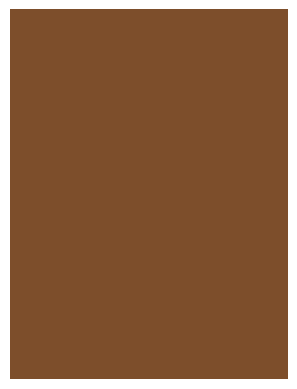

In [12]:
img_flat1 = img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat1[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off');

To understand what happened, I’ll run through the K-means steps:

1. The centroid is randomly placed in the color space.
2. Each point is assigned to its nearest centroid. Since there is only one centroid, all points belong to the same cluster.
3. The centroid’s location updates to the mean position of all assigned points. With only one centroid, it moves to the average color of all pixels.
4. These steps repeat until convergence. Here, the model converges after just one iteration.

After convergence, each pixel’s RGB values are replaced with the centroid’s RGB values. The resulting image shows the tulips where every pixel has the average color—a muddy brown blending all original colors.

To verify this, I can manually calculate the average for each RGB channel from the flattened array, confirming the centroid’s color.

In [13]:
column_means = img_flat.mean(axis=0)

print('column means: ', column_means)

column means:  [125.60802083  78.90632813  43.45473958]


Now, I can compare this to what the K-means model calculated as the final location of its one centroid.

In [14]:
print('cluster centers: ', kmeans.cluster_centers_)

cluster centers:  [[125.60802083  78.90632813  43.45473958]]


They're the same! Now, let's return to the 3-D rendering of the data, only this time I'll add the centroid.

In [ ]:
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for 
                                        r,g,b in zip(img_flat_df.r.values, 
                                                     img_flat_df.g.values, 
                                                     img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)


# Add centroid to chart
centroid = kmeans.cluster_centers_[0].tolist()

fig.add_trace(
    go.Scatter3d(x = [centroid[0]],
                 y = [centroid[1]],
                 z = [centroid[2]],
                 mode='markers',
                 marker=dict(size=7,
                             color=['rgb(125.79706706,78.8178776,42.58090169)'],
                             opacity=1))
)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

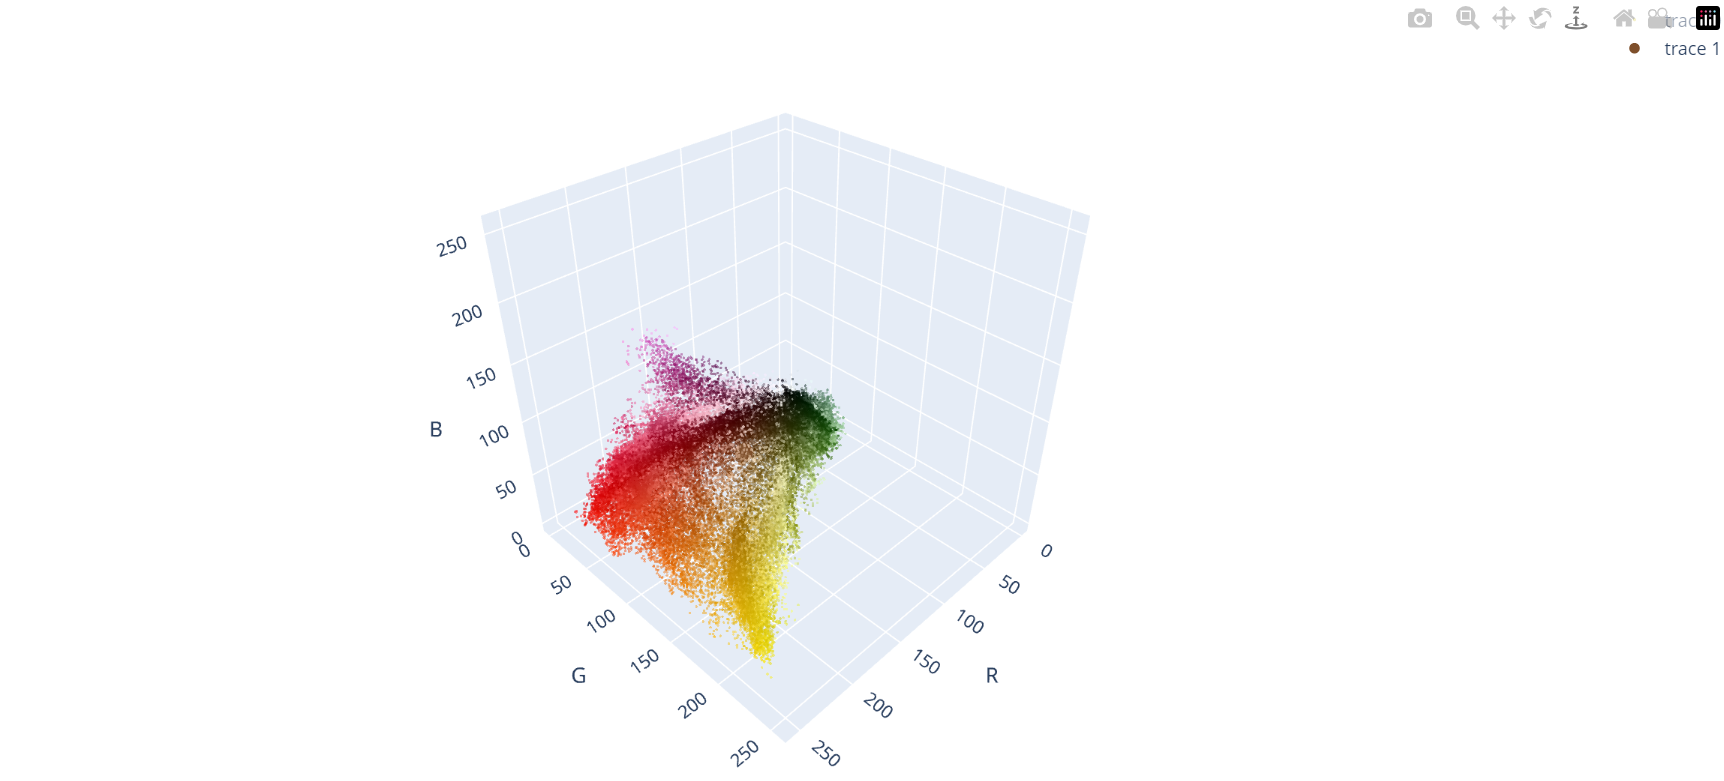

I can see the centroid as a large circle in the middle of the colorspace. (If it’s not immediately visible, click on the image and spin or zoom it.) Notice how this marks the “center of gravity” of all the points in the graph.

#### **Viewing Interactive Visualizations**

Plotly graphs are fully interactive — they can be rotated, zoomed, and explored in detail, but only in environments that support it (not in GitHub’s notebook preview). To view them interactively, set `pio.renderers.default` to `'notebook'`. To open in a browser, switch it to `'browser'` as shown in the next cell and run it in a compatible environment.

In [16]:
# pio.renderers.default = 'browser'

# # Create 3-D plot where each pixel in the `img` is displayed in its actual color
# trace = go.Scatter3d(x = img_flat_df.r,
#                      y = img_flat_df.g,
#                      z = img_flat_df.b,
#                      mode='markers',
#                      marker=dict(size=1,
#                                  color=['rgb({},{},{})'.format(r,g,b) for 
#                                         r,g,b in zip(img_flat_df.r.values, 
#                                                      img_flat_df.g.values, 
#                                                      img_flat_df.b.values)],
#                                  opacity=0.5))

# data = [trace]

# layout = go.Layout(margin=dict(l=0,
#                                r=0,
#                                b=0,
#                                t=0))

# fig = go.Figure(data=data, layout=layout)


# # Add centroid to chart
# centroid = kmeans.cluster_centers_[0].tolist()

# fig.add_trace(
#     go.Scatter3d(x = [centroid[0]],
#                  y = [centroid[1]],
#                  z = [centroid[2]],
#                  mode='markers',
#                  marker=dict(size=7,
#                              color=['rgb(125.79706706,78.8178776,42.58090169)'],
#                              opacity=1))
# )
# fig.update_layout(scene = dict(
#                     xaxis_title='R',
#                     yaxis_title='G',
#                     zaxis_title='B'),
#                   )
# fig.show()

Now let’s try something else. I’ll refit a K-means model to the data, this time using *k* = 3.

### Cluster the data: _k_ = 3

In [17]:
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(img_flat)

np.unique(kmeans3.labels_)

array([0, 1, 2], dtype=int32)

The `.cluster_centers_` attribute returns an array where each element represents the coordinates of a centroid — in this case, their RGB values. I’ll use these coordinates just like before to generate the colors that correspond to each of the centroids.

In [18]:
centers = kmeans3.cluster_centers_
centers

array([[202.94809272, 174.18418712, 111.37454869],
       [ 41.26942958,  50.19883774,  15.9462609 ],
       [176.79647115,  43.60730575,  27.50588141]])

Now I’ll create a helper function to quickly display any RGB values as color swatches, then use it to visualize the colors represented by the centroids of the K-means model.

In [19]:
def show_swatch(RGB_value):
    '''
    Takes in an RGB value and outputs a color swatch
    '''
    R, G, B = RGB_value
    rgb = [[np.array([R,G,B]).astype('uint8')]]
    plt.figure()
    plt.imshow(rgb)
    plt.axis('off');

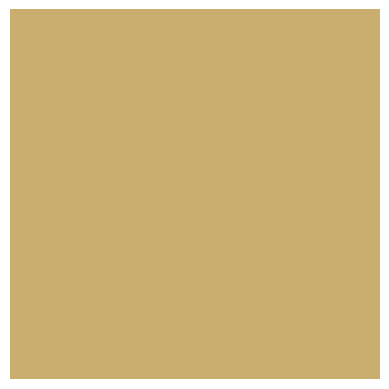

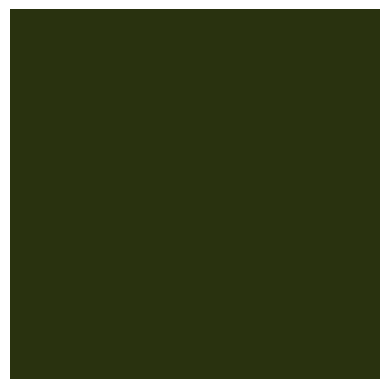

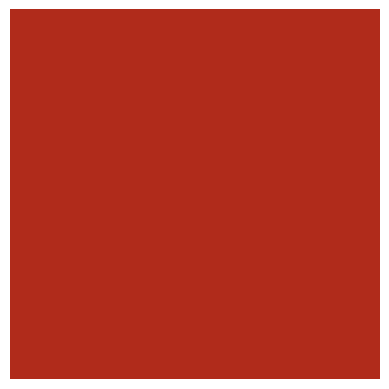

In [20]:
for pixel in centers:
    show_swatch(pixel)

As I thought, I see similar colors resulting from the 3-cluster model. Looking at the original tulip image, it’s clear there are three dominant colors: reds, greens, and golds/yellows, which matches closely what the model found.

Now, just like before, I’ll replace each pixel’s color in the original image with the RGB value of the centroid it belongs to.

In [21]:
def cluster_image(k, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image.

    Args:
      k:    (int)          - selected K-value
      img:  (numpy array)  - original image converted to a numpy array

    Returns:
      The output of plt.imshow(new_img), where new_img is a new numpy array 
      where each row of the original array has been replaced with the 
      coordinates of its nearest centroid.
    '''
    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)

    return plt.imshow(new_img), plt.axis('off');


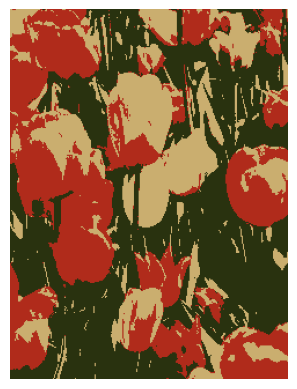

In [22]:
cluster_image(3);

I now have a photo with just three colors. Each pixel’s RGB values correspond to the RGB values of its nearest centroid.

Next, I’ll revisit the 3-D color space visualization. This time, I’ll re-color each dot to match the color of its assigned centroid. This will help me see how K-means clustered the data in color space.

In [23]:
print(kmeans3.labels_.shape)
print(kmeans3.labels_)
print(np.unique(kmeans3.labels_))
print(kmeans3.cluster_centers_)

(76800,)
[0 0 2 ... 2 2 2]
[0 1 2]
[[202.94809272 174.18418712 111.37454869]
 [ 41.26942958  50.19883774  15.9462609 ]
 [176.79647115  43.60730575  27.50588141]]


In [24]:
img_flat_df['cluster'] = kmeans3.labels_
img_flat_df.head()

,r,g,b,cluster
0,211,197,38,0
1,199,181,21,0
2,178,154,0,2
3,185,152,0,2
4,184,145,0,2


In [25]:
series_conversion = {0: 'rgb' +str(tuple(kmeans3.cluster_centers_[0])),
                     1: 'rgb' +str(tuple(kmeans3.cluster_centers_[1])),
                     2: 'rgb' +str(tuple(kmeans3.cluster_centers_[2])),
                     }
series_conversion

{0: 'rgb(np.float64(202.94809272146847), np.float64(174.1841871173658), np.float64(111.37454868923531))',
 1: 'rgb(np.float64(41.269429576384994), np.float64(50.19883774277533), np.float64(15.946260896160464))',
 2: 'rgb(np.float64(176.79647115307642), np.float64(43.607305753381844), np.float64(27.505881411538578))'}

In [26]:
img_flat_df['cluster'] = img_flat_df['cluster'].map(series_conversion)
img_flat_df.head()

,r,g,b,cluster
0,211,197,38,"rgb(np.float64(202.94809272146847), np.float64..."
1,199,181,21,"rgb(np.float64(202.94809272146847), np.float64..."
2,178,154,0,"rgb(np.float64(176.79647115307642), np.float64..."
3,185,152,0,"rgb(np.float64(176.79647115307642), np.float64..."
4,184,145,0,"rgb(np.float64(176.79647115307642), np.float64..."


In [ ]:
pio.renderers.default = 'notebook'

trace = go.Scatter3d(
    x=img_flat_df.r,
    y=img_flat_df.g,
    z=img_flat_df.b,
    mode='markers',
    marker=dict(
        size=1,
        color=[f'rgb({int(r)}, {int(g)}, {int(b)})' for r, g, b in zip(img_flat_df.r, img_flat_df.g, img_flat_df.b)],
        opacity=1
    )
)

data = [trace]

layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=data, layout=layout)
fig.show()

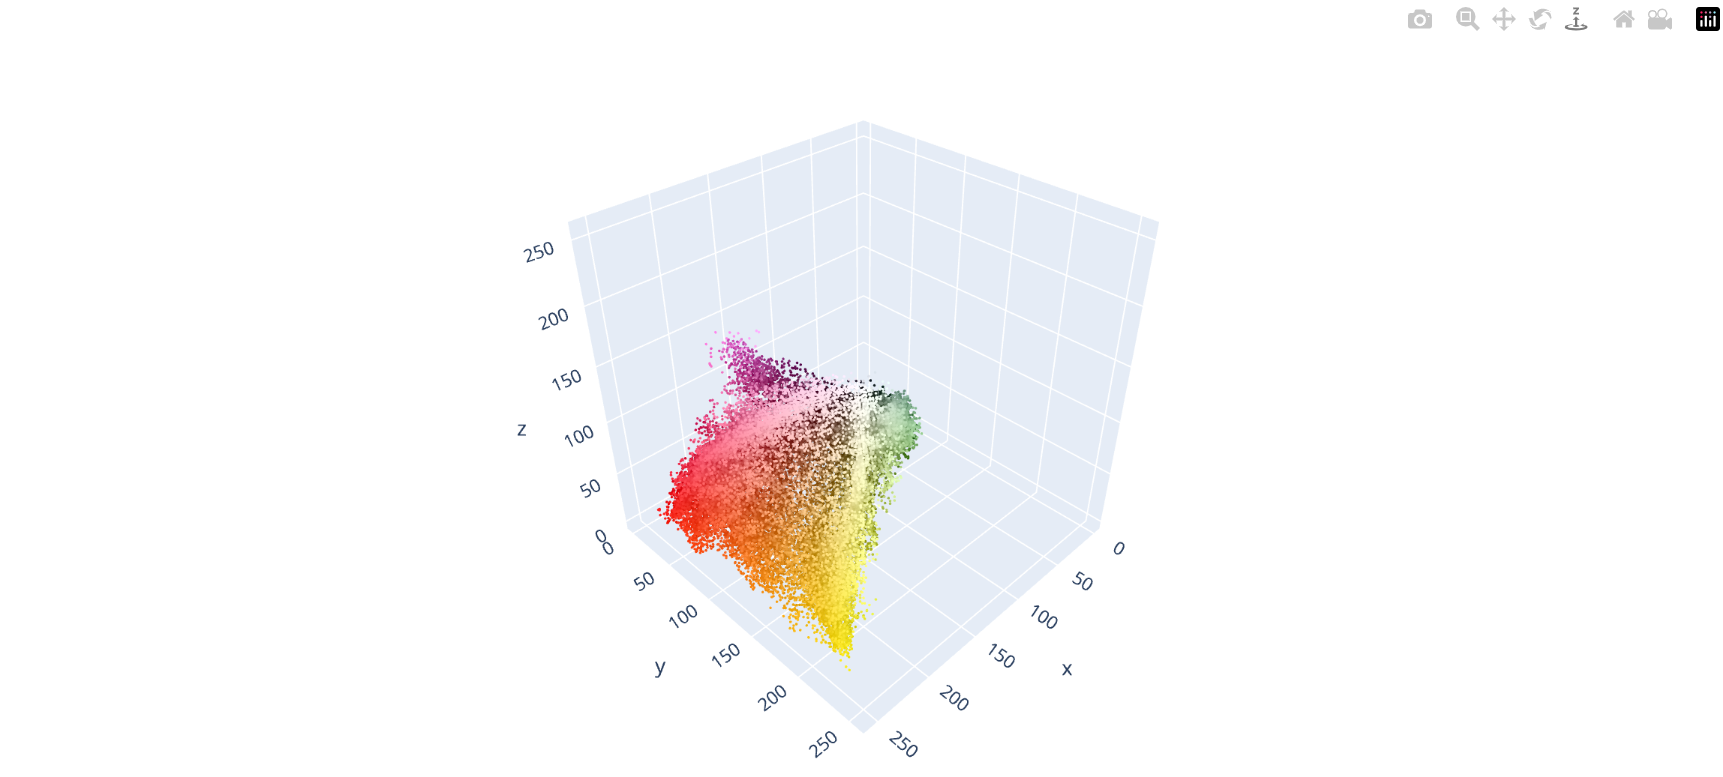

#### **Viewing Interactive Visualizations**

Plotly graphs are fully interactive — they can be rotated, zoomed, and explored in detail, but only in environments that support it (not in GitHub’s notebook preview). To view them interactively, set `pio.renderers.default` to `'notebook'`. To open in a browser, switch it to `'browser'` as shown in the next cell and run it in a compatible environment.

In [28]:
# pio.renderers.default = 'browser'

# # Replot the data, now showing which cluster (i.e., color) it was assigned to by K-means when k=3
# trace = go.Scatter3d(
#     x=img_flat_df.r,
#     y=img_flat_df.g,
#     z=img_flat_df.b,
#     mode='markers',
#     marker=dict(
#         size=1,
#         color=[f'rgb({int(r)}, {int(g)}, {int(b)})' for r, g, b in zip(img_flat_df.r, img_flat_df.g, img_flat_df.b)],
#         opacity=1
#     )
# )

# data = [trace]

# layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

# fig = go.Figure(data=data, layout=layout)
# fig.show()

One might wonder why the clusters look the way they do in the first 3-D plot — for example, why there’s a sharp boundary between red and green, even though the data doesn’t show a clear gap there.

That’s not wrong. While there isn’t a single “correct” way to cluster, some clusterings can definitely be better than others.

Upon closely examining the original 3-D rendering, the data forms long bands instead of round blobs. K-means works best with roughly circular clusters because it minimizes distances to centroids. 

So when the data forms long, narrow, and continuous bands rather than distinct, circular clusters, a different clustering algorithm might fit better. In such cases, algorithms like **DBSCAN** or **Gaussian Mixture Models (GMM)** can often yield more natural and accurate groupings that better reflect the structure of the data.

Still, K-means does a good job compressing the colors in this photo. I can repeat this process for any value of *k*. Below are the results for *k* ranging from 2 to 10.

### Cluster the data: _k_ = 2-10

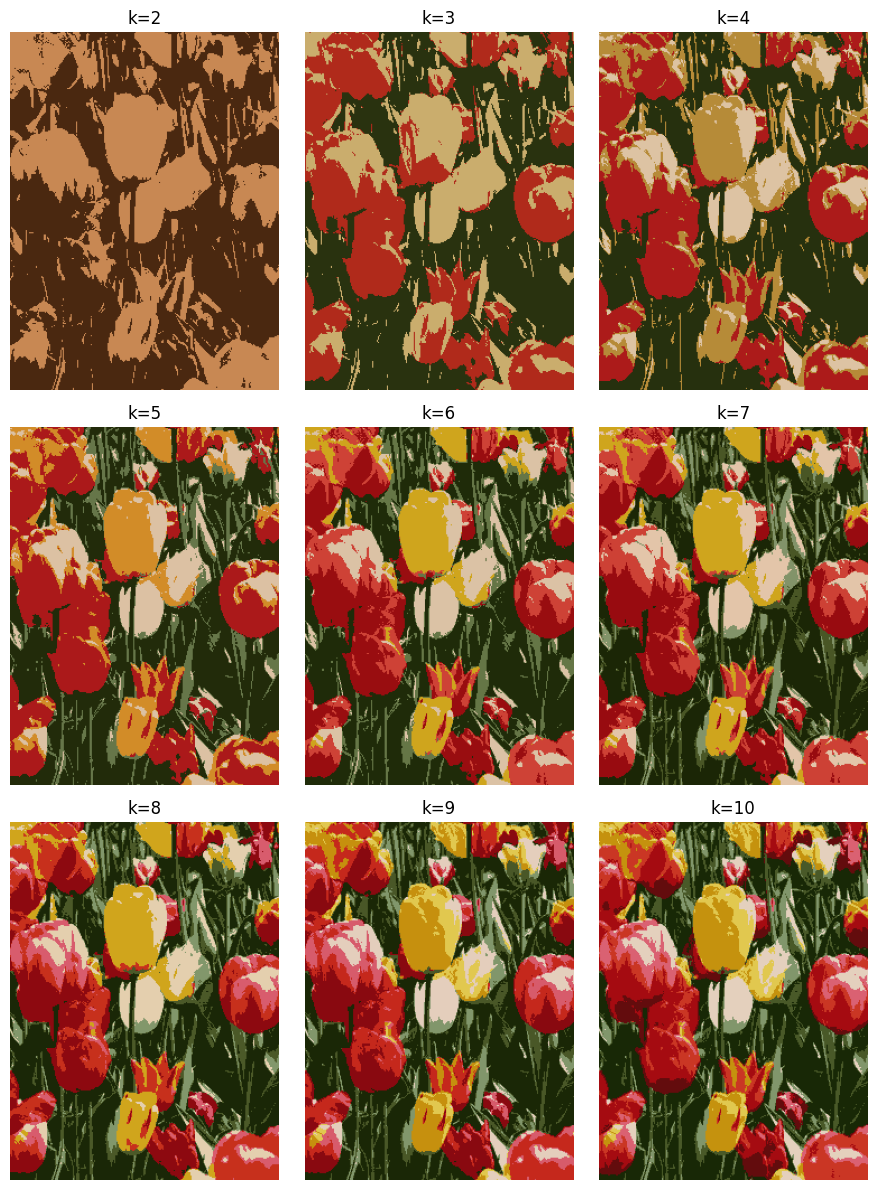

In [29]:
def cluster_image_grid(k, ax, img):
    """
    Fits a K-means model to an image.
    Replaces pixels with the RGB values of their cluster centroids.
    Displays the updated image on an axis of a figure.

    Args:
      k (int): Number of clusters (K-value).
      ax (matplotlib.axes._subplots.AxesSubplot): Axis to plot the image.
      img (numpy array): The original image in a NumPy array.

    Returns:
      None (Displays the clustered image on the given axis).
    """
   
    img_flat = img.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(img_flat)

    new_img = kmeans.cluster_centers_[kmeans.labels_]

    new_img = np.clip(new_img, 0, 255)

    new_img = new_img.astype(np.uint8)

    new_img = new_img.reshape(img.shape)

    ax.imshow(new_img)
    ax.axis('off')
    ax.set_title(f'k={k}')

fig, axs = plt.subplots(3, 3, figsize=(9, 12))
axs = axs.flatten()

k_values = np.arange(2, 11)

for i, k in enumerate(k_values):
    cluster_image_grid(k, axs[i], img)

plt.tight_layout()
plt.show()

### **Conclusion**

This demonstration provided a **visual, intuitive understanding of K-means clustering** by applying it to image color compression within the RGB color space—a natural 3D example for grasping clustering behavior. By progressively reducing the number of distinct colors in a tulip image, the exercise illustrated how K-means groups similar data points by proximity to centroids, simplifying complex distributions while revealing limitations when handling elongated or gradient-like patterns.

While this stage emphasized **visual validation**, it also underscored essential lessons for real-world, high-dimensional applications where images aren’t available for inspection. The activity reinforced the importance of complementing visual outcomes with **quantitative metrics** such as inertia and silhouette scores to objectively assess clustering quality. These insights will directly inform the next stage of the project—evaluating K-means on **synthetic, non-visual datasets** where algorithmic robustness and metric-driven decision-making become indispensable. I will next explore systematic methods for selecting the optimal value of *k*, especially critical when visual inspection is impossible.

### **Key Takeaways**

This stage offered a clear, visual demonstration of K-means clustering mechanics through the color compression task, delivering conceptual clarity on how the algorithm iteratively updates centroids and minimizes within-cluster variance. It revealed how cluster behavior evolves as the number of clusters increases—initially reducing data to broad, averaged groups and progressively capturing finer details. This process highlighted the trade-off between preserving detail and maintaining model simplicity, reinforcing the need for systematic approaches to selecting an appropriate number of clusters.

The exercise also surfaced important algorithmic limitations, including K-means’ difficulty handling elongated or gradient-based clusters and its sensitivity to centroid initialization, addressed here through controlled randomization. Most importantly, it demonstrated that while images offer intuitive validation, real-world, high-dimensional clustering problems require **metric-based evaluation tools** such as inertia and silhouette scores. These insights lay the foundation for transitioning from visual clustering exercises to rigorous, quantitative assessment on synthetic, multidimensional datasets where visual inspection is no longer possible. This transition will be carried out in the next section of the project.

This mirrors a practical workflow: beginning with visual exploration, developing quantitative techniques, and applying those methods to real-world, complex datasets with a solid mathematical foundation.

# K-means inertia & silhouette score  

## Introduction

In this section, I will explore how to determine an appropriate value of *k* for a K-means clustering model when working with higher-dimensional data that cannot be easily visualized in 2D or 3D space. By applying quantitative evaluation methods—specifically, inertia and silhouette score from scikit-learn—I will demonstrate how to assess clustering performance numerically and guide the selection of an optimal number of clusters in situations where visual inspection isn’t possible.

## Overview

This section demonstrates how to determine the optimal number of clusters for a K-means model using high-dimensional, non-visual data. While the previous section used an image to build visual intuition, this part shifts to synthetic data to focus on clustering mechanics and evaluation. The process involves scaling the data, fitting the model, and calculating metrics like inertia and silhouette score.

Key steps include scaling the data using `StandardScaler`, instantiating and fitting the K-means model, accessing the `labels_` and `inertia_` attributes, applying scikit-learn’s `silhouette_score` function, and ultimately determining the best value for *k*. This exercise highlights the importance of quantitative techniques for assessing clustering quality when visual inspection isn’t possible. The workflow reflects real-world practice—moving from visual examples to mathematical tools for evaluating complex datasets—showcasing K-means' versatility across different data types.

### Import Packages

I will begin by importing the necessary Python libraries for this demonstration:

* **numpy** for numerical operations and array handling.
* **pandas** for data manipulation and analysis.
* **sklearn.cluster.KMeans** to implement the K-means clustering algorithm.
* **sklearn.metrics.silhouette\_score** to evaluate the quality of clusters.
* **sklearn.preprocessing.StandardScaler** for scaling features before clustering.
* **sklearn.datasets.make\_blobs** to generate synthetic data for clustering.
* **seaborn** for creating statistical data visualizations and exploratory analysis.
* **pickle** for saving and loading trained models for future use.

Of particular note here, are the `Kmeans`, `silhouette_score`, and `StandardScaler` statements. These are the elements directly related to the K-means modeling process.

### Create the data

In practice, I would work with a real dataset, performing exploratory data analysis, cleaning, and preprocessing before modeling. However, since the objective here is to study, understand, and learn the workings of the K-means algorithm, this demonstration uses synthetic data to keep the focus on the clustering process itself.

I begin by creating a random number generator to ensure reproducibility. This lets me generate clustered data without knowing the exact number of clusters in advance.

In [30]:
rng = np.random.default_rng(seed=44)

By calling the random number generator and assigning the result to a variable, I can avoid seeing the true number of clusters in the data. This keeps the “answer” hidden and allows me to use inertia and silhouette scores to estimate the optimal number of clusters.

In [31]:
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)

The steps that generated the synthetic data give us two outputs: `X`, which holds the actual synthetic data points, and `y`, which holds the cluster labels for each point. Since I’m treating this as a mystery dataset to practice clustering evaluation, I’ll focus on `X`.

In [32]:
print(X.shape)
print(X[:5])

(1000, 6)
[[-1.53428804  5.46780798 -6.9459876   1.40393369  1.55383562 -7.6182362 ]
 [-6.68101954  6.71780799  2.76439561  4.46074414 -8.28656882 10.95970824]
 [-8.67830953  7.82530565  3.13969905  5.60995079 -9.94807876  8.07214936]
 [-6.66738504  7.1476371   2.14550504  4.71293693 -9.54470767 11.09324808]
 [-2.7538351  -4.20996782  0.62034452 -7.43950512 -4.40572288 -2.0461495 ]]


It’s currently in array form, but since real-world datasets are usually structured as pandas dataframes, I’ll convert `X` into a dataframe to make it easier to inspect, manipulate, and visualize.

In [33]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149


I see that the data has 6 features (columns), which makes it impossible for me to visualize clearly in 2-D or 3-D space. Since I can't rely on visual cues to estimate the number of clusters, I'll need to approach this analytically — using metrics like inertia and silhouette scores to guide me.


### Scale the Data

Since K-means relies on distances between points and centroids, it’s important to scale the data before modeling—especially when features have different units or scales. For example, if I have penguin data with height in meters and weight in grams, weight values could dominate due to their larger scale, skewing the clustering.

To fix this, I use scikit-learn’s `StandardScaler`, which standardizes each feature by subtracting its mean and dividing by its standard deviation:

$$
x_{\text{scaled}} = \frac{x_i - \text{mean}(x)}{\sigma}
$$

After scaling, each feature has mean 0 and standard deviation 1, so all features contribute equally. There are other scaling methods (`MinMaxScaler`, `Normalizer`, etc.), but any scaling is usually better than none for K-means.

I instantiate `StandardScaler` and scale the data in one step using `.fit_transform()`. As a tip, I’ll keep a copy of the original, unscaled data in case it’s needed later. The scaled data will be assigned to a new variable to preserve the original.

In [34]:
X_unscaled = X.copy()

In [35]:
std_scaler = StandardScaler().fit(X_unscaled)  
X_scaled = std_scaler.transform(X_unscaled)
X_scaled[:2,:]

array([[-0.03173691,  0.4864719 , -1.32178135,  0.59808997,  1.5703227 ,
        -0.88951855],
       [-1.05006137,  0.68381835,  0.74465777,  1.2564266 , -0.97057774,
         1.92995522]])

Here, I create a scaler object by fitting `StandardScaler` to the unscaled data and then transform it; alternatively, I could use `X_scaled = StandardScaler().fit_transform(X_unscaled)`, but creating and saving the scaler object allows me to reuse it later for scaling new data consistently.

### Instantiate the Model

Now that the data is scaled, I can move on to modeling. Since I don’t yet know how many clusters the data should have, I’ll begin by examining the inertia values for different values of *k*.

By default, scikit-learn uses an optimized version of the K-means algorithm called **K-means++**, which improves model convergence by initializing centroids far apart from each other. Because of this, I won’t need to rerun the model multiple times for different random starts.

I’ll start by instantiating the model. If I want to build a model that clusters the data into three groups, I’ll set the `n_clusters` parameter to 3. I’ll also set a `random_state` to an arbitrary number to ensure reproducibility—if this is left blank, others could replicate my code exactly and still get different results because of random centroid initialization.

In [36]:
kmeans3 = KMeans(n_clusters=3, random_state=42)

### Fit the data

Now that I’ve instantiated the model, the next step is to fit it to the data. I’ll do this by calling the `.fit()` method and passing in my scaled data.

In [37]:
kmeans3.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

I specify the path to where I want to save my model.

In [38]:
path = r'C:\Users\saswa\Documents\GitHub\Optimizing-K-in-K-means--A-Visual-and-Quantitative-Exploration\Fit_models\\'

In [39]:
# def write_pickle(path, model_object, save_as:str):
#     '''
#     In:
#         path:         folder path where the model should be saved  
#         model_object: the trained model to pickle  
#         save_as:      filename to save the model as (with .pkl extension)

#     Out: Saves the model as a pickle file in the specified folder
#     '''


#     with open(path + save_as + '.pickle', 'wb') as to_write:
#         pickle.dump(model_object, to_write)

In [40]:
def read_pickle(path, saved_model_name:str):
    '''
    In:  
        path:             folder path to load the model from  
        saved_model_name: filename of the pickled model to load  

    Out:  
        model: the unpickled model object  
    '''

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

I use the functions defined above to save the model in a pickle file and then read it in.

In [41]:
# write_pickle(path, kmeans3, 'kmeans3')

In [42]:
kmeans3 = read_pickle(path, 'kmeans3')

After fitting the K-means model, it returns a trained object that has “learned” from the data. This model exposes several useful attributes that allow us to inspect what it has computed, such as cluster assignments, centroid locations, and inertia. For a complete overview, refer to the scikit-learn K-means documentation which lists all available methods and attributes.

To see which cluster each data point belongs to, I use the `.labels_` attribute. The `.inertia_` attribute provides the total inertia, which is the sum of squared distances between each data point and its assigned cluster centroid—a measure of cluster compactness. 

Let's see what happens when I check the cluster assignments and inertia for this model.

In [43]:
print('Clusters: ', kmeans3.labels_)
print('Inertia: ', kmeans3.inertia_)

Clusters:  [2 0 0 0 1 1 1 0 0 2 1 0 0 2 0 0 0 0 1 1 1 0 0 0 2 2 1 0 0 1 1 0 1 1 2 2 1
 0 0 0 1 0 1 0 0 1 1 2 0 2 1 1 1 2 2 2 1 0 1 2 1 1 1 1 1 1 1 2 1 1 0 1 1 1
 0 1 0 2 2 0 2 0 1 2 1 0 2 2 0 2 0 1 2 0 1 2 1 0 0 1 1 0 0 0 0 0 0 1 1 0 2
 1 0 1 0 0 1 1 2 1 1 1 0 1 1 0 0 1 2 0 2 2 2 1 0 2 2 1 0 1 1 1 0 2 2 2 1 1
 0 1 1 0 1 1 0 0 2 0 2 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 2 0 0 2 2 1 0 1 0 1
 0 2 0 2 0 1 1 1 0 0 0 2 2 0 1 0 0 1 0 1 1 1 1 1 2 1 2 0 0 1 2 2 0 1 1 2 1
 0 0 0 0 1 1 1 0 2 1 2 0 2 0 2 1 1 0 0 0 2 2 1 1 2 2 2 0 0 0 1 1 1 0 0 0 1
 0 1 2 1 0 0 2 2 1 1 0 1 2 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 2 1 0 1 2 2
 1 0 0 1 0 0 0 0 0 0 2 0 2 1 0 0 2 1 1 0 1 0 0 2 0 1 0 0 0 1 1 1 2 2 2 1 2
 2 2 0 0 2 0 2 1 0 1 2 0 2 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 2 0 0 0 0 0 1 1 2
 1 0 0 1 0 1 1 0 1 0 2 0 0 1 0 1 1 2 0 1 1 1 2 1 1 0 1 0 1 0 2 0 1 0 0 1 1
 2 0 1 1 2 1 1 0 0 0 0 1 0 1 0 0 2 2 1 2 1 1 1 0 0 2 1 0 0 0 1 0 1 0 2 0 1
 2 1 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 2 1 2 0 1 1 1 1 2 0
 0 1 0 0 2 2 0

The `.labels_` attribute returns an array of cluster labels, with one label for each data point in the training set. Each label indicates the cluster the point belongs to. For instance, if the model finds three clusters, the labels will be 0, 1, or 2. These numbers are just arbitrary identifiers and do not imply any order or ranking among clusters.

The `.inertia_` attribute gives the sum of squared distances between each data point and its closest cluster centroid. This measures how tightly grouped the points are within their clusters — the lower the inertia, the more compact the clusters are.

## Evaluate inertia

This inertia value isn't helpful by itself. I need to compare the inertias of multiple *k* values. To do this, I’ll create a function that fits a K-means model for multiple values of *k*, calculates the inertia for each *k*, and appends it to a list.

In [44]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [45]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[3686.250158732795,
 1748.1488703079494,
 1124.6368935738383,
 239.65434758718402,
 232.72871508015103,
 224.2967507228996,
 216.22784318026882,
 210.9898998155354,
 202.30181069359625]

### Elbow plot

Now I can plot these values in a simple line graph, with the *k* values along the x-axis and inertia on the y-axis. This type of plot is called an elbow plot. The "elbow" is usually the part of the curve with the sharpest angle — where the reduction in inertia that occurs when a new cluster is added starts to level off.

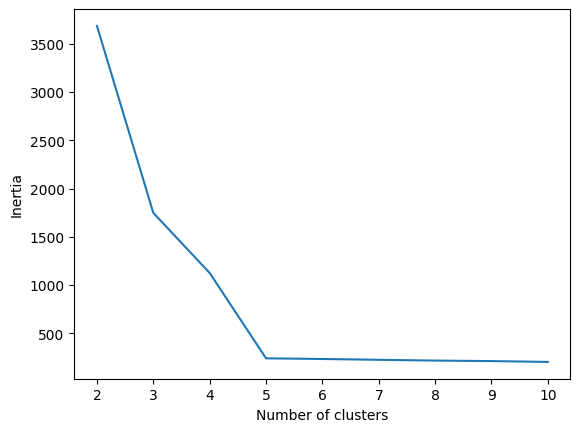

In [46]:
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

This plot contains an unambiguous elbow at five clusters. Models with more than five clusters don't seem to reduce inertia much at all. Right now, it seems like a 5-cluster model might be optimal.

I’ll now check silhouette scores to see if the results support this conclusion from the inertia plot.

## Evaluate silhouette score

Unlike inertia, silhouette score doesn’t have its own attribute that I can call on the model object. To get a silhouette score, I have to use the `silhouette_score()` function that I imported from `sklearn.metrics`. I’ll pass it two required parameters: my training data and their assigned cluster labels. Let’s see what this looks like for the `kmeans3` model I created earlier.

In [47]:
kmeans3_sil_score = silhouette_score(X_scaled, kmeans3.labels_)
kmeans3_sil_score

np.float64(0.5815196371994132)

It worked! However, this value isn’t very useful if I have nothing to compare it to. Just as I did for inertia, I’ll write a function that compares the silhouette score of each value of *k*, from 2 through 10.

In [48]:
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [49]:
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[np.float64(0.4200596601751042),
 np.float64(0.5815196371994132),
 np.float64(0.6490608412777439),
 np.float64(0.7670656870960784),
 np.float64(0.6376325996351012),
 np.float64(0.5100290191946067),
 np.float64(0.4024771015104519),
 np.float64(0.39985510906365535),
 np.float64(0.2748795855657769)]

I can plot the silhouette score for each value of *k*, just as I did for inertia. However, I’ll keep in mind that for silhouette score, higher values (closer to 1) are better — so I’ll be hoping to see at least one clear peak approaching 1.

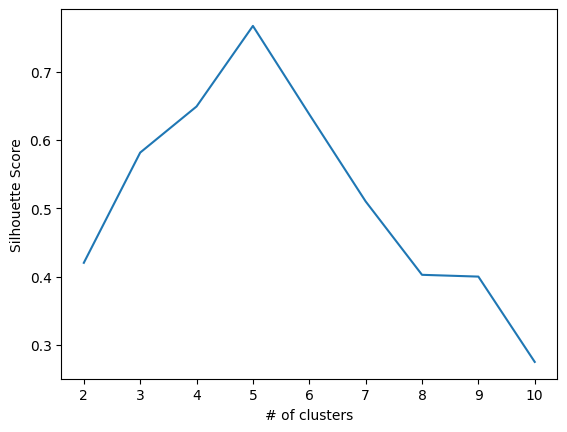

In [ ]:
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Silhouette Score");

This plot indicates that the silhouette score is closest to 1 when my data is partitioned into five clusters. It confirms what I saw in the inertia analysis, where there was a noticeable elbow at *k* = 5.

At this point, between my inertia and silhouette score analyses, I can say with a reasonable degree of confidence that it makes the most sense to group my data into five clusters.

Since I generated the synthetic data myself, I can directly reference the `centers` variable created earlier with the random number generator to know how many clusters are actually present in the dataset.

In [51]:
centers

np.int64(5)

Its right! Just as I determined, there are indeed five distinct clusters in this data. I was able to deduce this by using inertia and silhouette score! 

### Further analysis

Although I know that five clusters is the best grouping for the data, the work is far from done. At this point, I’ll instantiate a new K-means model with `n_clusters=5` and fit it to my data. 

Note that if I had saved all the models fitted earlier for different values of *k*, I wouldn’t need to refit now; I could just call the saved model. But since I didn’t save it, I must fit another model.

In [52]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [53]:
# write_pickle(path, kmeans5, 'kmeans5')

In [54]:
kmeans5 = read_pickle(path, 'kmeans5')

In [55]:
print(kmeans5.labels_[:5])
print('Unique labels:', np.unique(kmeans5.labels_))

[2 0 0 0 1]
Unique labels: [0 1 2]


Now that I have the cluster labels, it’s important to understand what they mean and decide if this clustering makes sense for my use case. To help with that, I’ll use the unscaled data I kept from the beginning. I’ll assign a new column to the original unscaled dataframe with the cluster assignments from the final K-means model.

In [56]:
X['cluster'] = kmeans5.labels_
X.head()

,0,1,2,3,4,5,cluster
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236,2
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708,0
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149,0
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248,0
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149,1


Now that I have cluster assignments, I can analyze the characteristics that differentiate each cluster. Examining clusters using the unscaled data often makes interpretation easier since the values are in their original units. However, depending on my goals, analyzing clusters on the scaled data might also be appropriate.

It’s important to remember that identifying meaningful differences between clusters isn’t always straightforward—it often requires domain expertise and careful analysis to determine if the clustering makes sense for my data.

This project focused on demonstrating and learning the fundamentals of K-means clustering. With this foundation, I’m now prepared to apply K-means and related techniques effectively to real-world datasets. I’ve also been introduced to two key evaluation tools—inertia and silhouette score—and learned how to implement them using scikit-learn.

Next, I will proceed to making predictions on new data.

## Predicting on new data

This isn’t applicable to all clustering tasks, but it is now possible to take in new data and predict a cluster assignment using my final model.

To demonstrate this, I’ll create a new observation—one that was not contained in the original data—using the same random number generator from the start of the notebook.

In [57]:
new_observation = rng.uniform(low=-10, high=10, size=6).reshape(1, -1)
new_observation

array([[-4.8377385 , -1.88458544,  9.38367896, -6.7536575 ,  7.14587347,
        -6.73909458]])

Just as before, I must scale new data using the **same parameters learned from the training data**. This means subtracting the training data’s mean and dividing by its standard deviation. If unscaled data is fed into the model by mistake, the predictions will be invalid since the model was trained on scaled data.

If I hadn’t saved the scaler object when scaling earlier, I would need to recreate and fit a new scaler on the original training data to get the correct parameters. That’s why saving the fitted scaler is important.

For example, if instead of:

```python
std_scaler = StandardScaler().fit(X_unscaled)
X_scaled = std_scaler.transform(X_unscaled)
```

I had written:

```python
X_scaled = StandardScaler().fit_transform(X_unscaled)
```

then later, to scale new data, I would need to fit a new scaler again rather than reusing the previously fitted one. Saving the fitted scaler ensures consistent scaling for all future data without refitting.

In [58]:
new_observation_scaled = std_scaler.transform(new_observation)
new_observation_scaled

array([[-0.68535259, -0.67430308,  2.1532887 , -1.15878741,  3.01424824,
        -0.75609599]])

I can use the `.predict()` method of my `kmeans5` model to assign a cluster to the new observation by passing it as an argument. Even though this example uses a single observation, I could also pass an array of new data points, and the method would return an array of predicted cluster labels for each.

In [59]:
new_prediction = kmeans5.predict(new_observation_scaled)
new_prediction

array([2], dtype=int32)

The model has assigned this new observation to cluster 4. 

### Calculating the distance to each centroid

The KMeans model also lets me access the distances of observations from *each* centroid. For new data, I can do this using the `.transform()` method of the fitted model object.

In [60]:
distances = kmeans5.transform(new_observation_scaled)
distances

array([[5.08864093, 4.18868276, 4.14567617]])

Notice that the `.transform()` method returns an array. Since I gave the model a single new data point, it returned an array of five numbers (because my model has five clusters). Each value in this array represents the distance between the `new_observation_scaled` and the centroid of the cluster at that index.

So, the distance between `new_observation_scaled` and the centroids of:

Cluster 0 = 5.12  
Cluster 1 = 4.55  
Cluster 2 = 4.15  
Cluster 3 = 5.96  
Cluster 4 = 3.47  

The shortest distance is 3.47—between `new_observation_scaled` and cluster 4's centroid. This is why the point was assigned to cluster 4 when I used the `.predict()` method above.

### Using Clustering for Real-Time Assignments and Feature Engineering

One situation where assigning new points to clusters is useful is when a deployed model, trained on large datasets, needs to handle incoming data individually. For example, imagine a marketing program that sends tailored promotional emails based on customer engagement patterns. When a new customer arrives, I can use the clustering model to assign them to the right cluster—and therefore the most suitable marketing campaign—ensuring they receive promotions that fit their behavior.

Also, I can use both the cluster predictions and the distances to centroids as new features in supervised learning models. By clustering the training data first, I can add the cluster assignments or distance metrics as engineered features to potentially improve the predictive power of my supervised model.

### **Conclusion**

This demonstration established a **quantitative, metric-driven approach to K-means clustering** by applying it to high-dimensional synthetic data where visual inspection was not possible. By evaluating clustering performance using inertia and silhouette scores, I systematically identified an optimal number of clusters, reinforcing best practices for real-world applications where data resides in abstract, multidimensional spaces.

In addition to model evaluation, this section of the project highlighted the importance of **critical preprocessing steps**, particularly the need to scale data prior to clustering to ensure fair, distance-based comparisons between features. Beyond cluster selection, the section underscored how clustering outputs—such as cluster labels and distance metrics—can support downstream tasks like real-time segmentation or predictive feature engineering. These insights directly inform a potential iteration of the project—or a future project expansion—which will focus on interpreting cluster structures and integrating clustering results into supervised learning workflows.

### **Key Takeaways**

A major takeaway from this demonstration was the importance of **quantitative metrics for evaluating clustering quality** in high-dimensional datasets where visual validation is impractical. Inertia and silhouette scores offered complementary measures of cluster compactness and separation, guiding systematic, metric-based selection of an appropriate number of clusters without reliance on visual cues. This mirrors practical workflows where clustering decisions must be driven by interpretable, reproducible metrics.

Additionally, the section reinforced several important operational lessons: the necessity of **feature scaling** for distance-based algorithms like K-means, the practical utility of clustering model attributes for assigning new data to existing clusters, and the algorithm’s limitations when dealing with irregularly shaped or unevenly sized groups. By following a clear, reproducible pipeline—**scale → fit → evaluate → validate → predict**—this section established a strong foundation for applying unsupervised learning techniques to real-world datasets and integrating clustering outputs into broader analytical processes.

## **Final Thoughts & Process Overview**

This project followed a **structured modeling workflow** to demonstrate the application of **K-means clustering in both visual and high-dimensional data environments**. The process began with an intuitive, image-based example—**color compression using K-means on a tulip photograph**—which offered a tangible introduction to clustering fundamentals like **centroid placement, convergence, and the influence of cluster count (k)**.

Building on this foundation, the project transitioned to **synthetic, high-dimensional data**, shifting focus to **quantitative evaluation methods** where visual inspection is impractical. Through a reproducible pipeline—**scaling, fitting, evaluating, and validating**—I applied inertia and silhouette scores to guide cluster selection, confirming **k=5** as optimal based on both metrics and the hidden ground truth labels.

The project also highlighted essential operational practices, including the **critical role of feature scaling in distance-based algorithms** and the **practical value of clustering outputs for downstream tasks** like segmentation and predictive feature engineering. Overall, this exercise established a reliable, scalable framework for applying K-means in varied contexts—from exploratory analysis to production-ready segmentation pipelines.

## **Conclusion**

The project delivered a **comprehensive demonstration of clustering workflows** using both **visual and quantitative approaches**. Beginning with image color compression, the project showcased how K-means can efficiently reduce data complexity while preserving essential structure, reinforcing the relationship between cluster count and granularity of representation.

Transitioning to high-dimensional synthetic data, I applied **inertia and silhouette scores** to systematically determine the optimal cluster count of **k=5**. This phase emphasized the importance of **data scaling** and underscored how K-means outputs—like cluster assignments and centroid distances—can be repurposed for **predictive modeling and anomaly detection**.

While K-means proved effective for identifying **globular, evenly sized clusters**, its limitations in handling **irregular or elongated structures** suggest that alternative clustering methods may be better suited for more complex patterns. By combining **visual intuition with metric-based validation**, this project built a strong foundation for applying clustering techniques in real-world settings where data complexity often defies straightforward interpretation.

## **Next Steps**

To extend the insights from this project and enhance future clustering applications, the following actions are recommended:

* **Explore Alternative Clustering Algorithms**

  * Test **DBSCAN** for datasets with **noise, outliers, or non-globular cluster shapes**.
  * Evaluate **Gaussian Mixture Models (GMM)** for probabilistic cluster assignments and overlapping groups.

* **Apply K-means to Real-World Business Problems**

  * Deploy clustering for **customer segmentation** based on behavioral or transaction data.
  * Use centroid distances for **anomaly detection** in applications like fraud prevention or network monitoring.

* **Refine Evaluation Techniques**

  * Incorporate **domain-specific validations** to assess cluster utility and business relevance.
  * Use **per-cluster silhouette analysis** to detect poorly formed groups and inform remedial actions.

* **Integrate Clustering with Supervised Learning**

  * Leverage **cluster labels and distance-to-centroid measurements** as additional engineered features in classification and regression models to capture latent group structures and proximity-based patterns.
  * Additionally, experiment with **deep clustering techniques** that combine autoencoders and K-means to uncover complex patterns in high-dimensional data.

* **Mitigate Algorithmic Constraints**

  * Address **K-means’ sensitivity to initialization** with multiple runs (`n_init`) and alternative centroid seeding methods.
  * Develop **dimensionality reduction visualizations** (e.g., t-SNE, PCA) to interpret clustering outcomes in lower-dimensional spaces.

By pursuing these steps, I can expand my unsupervised learning toolkit and tackle more advanced clustering challenges—ensuring **robust, actionable insights even when data complexity obscures intuitive patterns**.